In [1]:
import pandas as pd
import seaborn as sns

In [41]:
df1 = pd.read_csv("2015.csv")
df2 = pd.read_csv("2016.csv")
df3 = pd.read_csv("2017.csv")
df1.drop(['Standard Error', 'Region'], axis=1, inplace=True)
df2.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Region'], axis=1, inplace=True)
df3.drop(['Whisker.high', 'Whisker.low'], axis=1, inplace=True)
df3 = df3.rename(index=str, columns={
        "Happiness.Rank": "Happiness Rank",
        "Happiness.Score": "Happiness Score",
        "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
        "Health..Life.Expectancy.": "Health (Life Expectancy)",
        "Trust..Government.Corruption.": "Trust (Government Corruption)",
        "Dystopia.Residual": "Dystopia Residual",
  })
df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017

In [54]:
df = pd.concat([df1, df2, df3], sort=False)

In [96]:
abs_changes = [(c, df[(df['Country']==c) & (df['Year']==2017)]['Happiness Score'].values[0] - \
                       df[(df['Country']==c) & (df['Year']==2015)]['Happiness Score'].values[0]) \
                             for c in pd.unique(df['Country']) \
                               if df[(df['Country']==c) & (df['Year']==2017)]['Happiness Score'].values and \
                                  df[(df['Country']==c) & (df['Year']==2015)]['Happiness Score'].values]

C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.
C:\Users\KindYAK\Anaconda3\envs\def\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [100]:
#Top 25 countries with largest happiness index change
abs_top_25 = sorted(abs_changes, key=lambda x: abs(x[1]), reverse=True)[:25]

In [102]:
countries = [i[0] for i in abs_top_25]

['Venezuela',
 'Lesotho',
 'Liberia',
 'Central African Republic',
 'Haiti',
 'Latvia',
 'Zimbabwe',
 'Romania',
 'Togo',
 'Senegal',
 'Zambia',
 'Mexico',
 'Ukraine',
 'Gabon',
 'Botswana',
 'Egypt',
 'Ivory Coast',
 'Hungary',
 'Ghana',
 'Bulgaria',
 'Yemen',
 'Croatia',
 'Syria',
 'Nepal',
 'Burkina Faso']

In [110]:
df_25 = df[(df['Country'].isin(countries)) & (df['Year'] == 2017)]
df_25

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
24,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.132774,0.120990,2.837155,2017
53,Latvia,54,5.850,1.260749,1.404715,0.638567,0.325708,0.073843,0.153075,1.993655,2017
56,Romania,57,5.825,1.217684,1.150091,0.685158,0.457004,0.004388,0.133520,2.176831,2017
74,Hungary,75,5.324,1.286012,1.343133,0.687763,0.175864,0.036637,0.078402,1.716459,2017
76,Croatia,77,5.293,1.222556,0.967983,0.701289,0.255772,0.043103,0.248003,1.854492,2017
81,Venezuela,82,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.065020,1.789464,2017
98,Nepal,99,4.962,0.479820,1.179283,0.504131,0.440306,0.072976,0.394096,1.891241,2017
103,Egypt,104,4.735,0.989702,0.997471,0.520187,0.282110,0.114381,0.128631,1.702161,2017
104,Bulgaria,105,4.714,1.161459,1.434379,0.708218,0.289232,0.011052,0.113178,0.996139,2017
114,Senegal,115,4.535,0.479309,1.179692,0.409363,0.377922,0.115460,0.183469,1.789646,2017


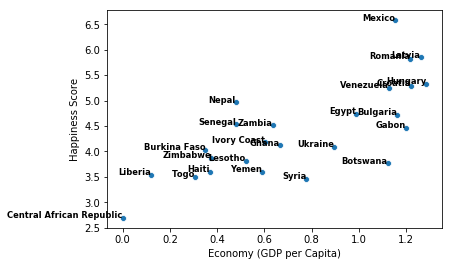

In [126]:
ax = sns.scatterplot(x="Economy (GDP per Capita)", y="Happiness Score", data=df_25)
for x in range(0, df_25.shape[0]):
     ax.text(df_25['Economy (GDP per Capita)'][x], 
             df_25['Happiness Score'][x], 
             df_25['Country'][x], horizontalalignment='right', size='small', color='black', weight='semibold')

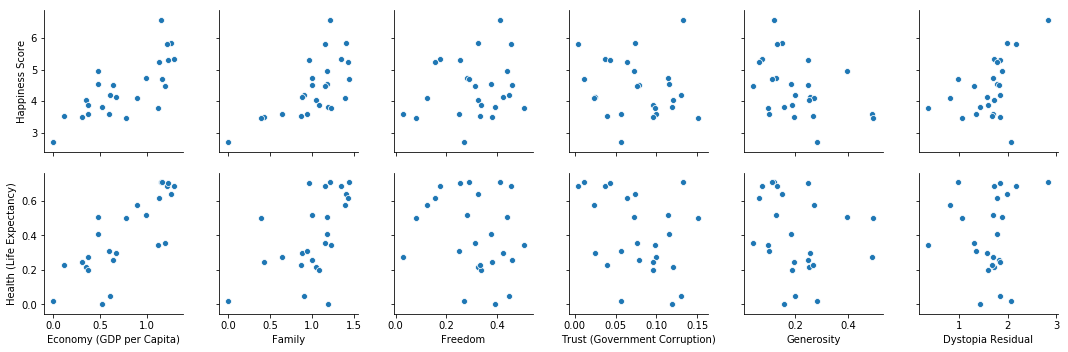

In [130]:
sns.pairplot(df_25, y_vars=["Happiness Score", 'Health (Life Expectancy)'], x_vars=["Economy (GDP per Capita)", "Family", "Freedom", "Trust (Government Corruption)", "Generosity", "Dystopia Residual"])

In [129]:
df_25.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

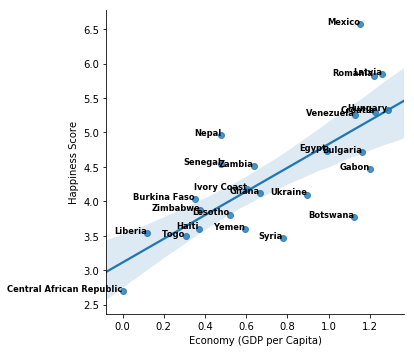

In [137]:
ax = sns.lmplot(x="Economy (GDP per Capita)", y="Happiness Score", data=df_25)
for x in range(0, df_25.shape[0]):
     ax.axes[0,0].text(df_25['Economy (GDP per Capita)'][x], 
             df_25['Happiness Score'][x], 
             df_25['Country'][x], horizontalalignment='right', size='small', color='black', weight='semibold')